### 📈 Visualizing the Greeks of Black-Scholes Options

This notebook explores the behavior of the **Greeks** — key sensitivity measures derived from the Black-Scholes model — across different combinations of **spot prices (S)** and **times to maturity (T)**.

We generate 3D surfaces using `matplotlib` to visualize how the following Greeks evolve for both **call** and **put** European options:

- **Delta**: Sensitivity to underlying asset price.
- **Gamma**: Sensitivity of delta to underlying asset price.
- **Vega**: Sensitivity to volatility.
- **Theta**: Sensitivity to time decay (daily basis).
- **Rho**: Sensitivity to interest rate.

All plots assume constant values for:
- Strike price $$ K = 100 $$
- Volatility $$ \sigma = 0.2 $$
- Risk-free rate $$ r = 0.05 $$

These visualizations help to intuitively understand how option risk metrics behave as inputs change. The Greeks are computed using the `greeks.py` module defined in the `src/` folder of this project.


In [10]:
import sys, os, numpy as np, matplotlib.pyplot as plt

sys.path.append(os.path.abspath("../src"))

from greeks import delta, gamma, vega, theta, rho

# Parameter setup
K = 100           # Strike price
r = 0.05          # Risk-free rate
sigma = 0.2       # Volatility
option_type = 'call'

# Grid ranges
S_range = np.linspace(50, 150, 50)
T_range = np.linspace(0.01, 1.0, 50)

# Create mesh grid
S_grid, T_grid = np.meshgrid(S_range, T_range)

# Allocate space for each Greek
Delta_grid = np.zeros_like(S_grid)
Gamma_grid = np.zeros_like(S_grid)
Vega_grid = np.zeros_like(S_grid)
Theta_grid = np.zeros_like(S_grid)
Rho_grid   = np.zeros_like(S_grid)

# Compute Greeks over the grid
for i in range(S_grid.shape[0]):
    for j in range(S_grid.shape[1]):
        S_val = S_grid[i, j]
        T_val = T_grid[i, j]
        Delta_grid[i, j] = delta(S_val, K, T_val, r, sigma, option_type)
        Gamma_grid[i, j] = gamma(S_val, K, T_val, r, sigma)
        Vega_grid[i, j]  = vega(S_val, K, T_val, r, sigma)
        Theta_grid[i, j] = theta(S_val, K, T_val, r, sigma, option_type)
        Rho_grid[i, j]   = rho(S_val, K, T_val, r, sigma, option_type)

In [11]:
def plot_greek_surface(S_grid, T_grid, greek_values, title, zlabel):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(S_grid, T_grid, greek_values, cmap='viridis', edgecolor='none')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Spot Price (S)')
    ax.set_ylabel('Time to Maturity (T)')
    ax.set_zlabel(zlabel)
    ax.view_init(elev=30, azim=225)
    plt.tight_layout()
    plt.show()

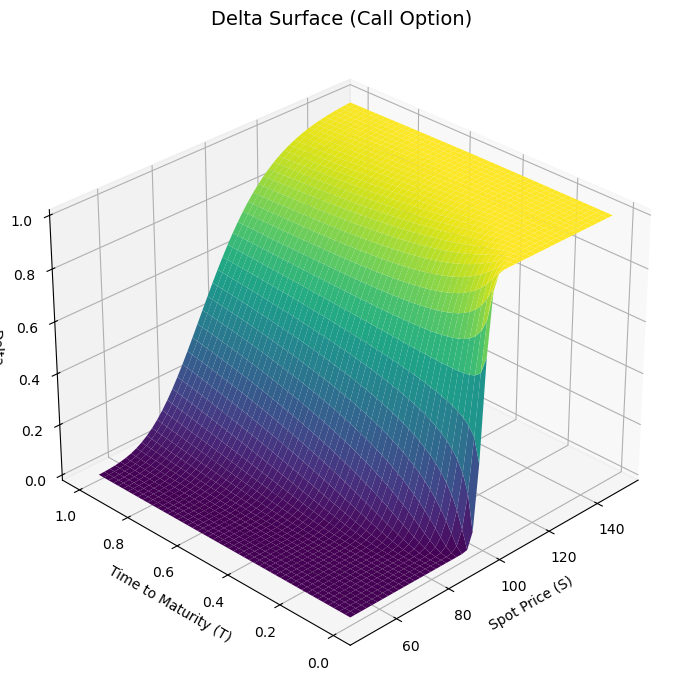

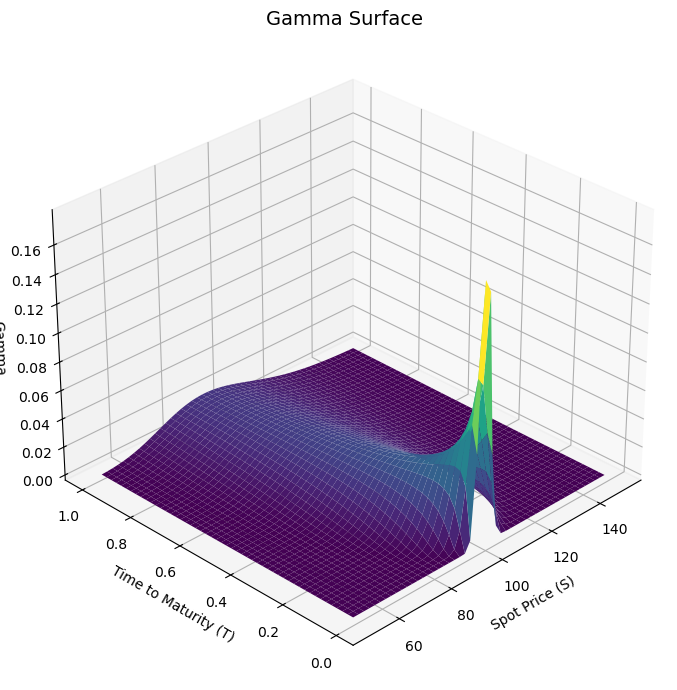

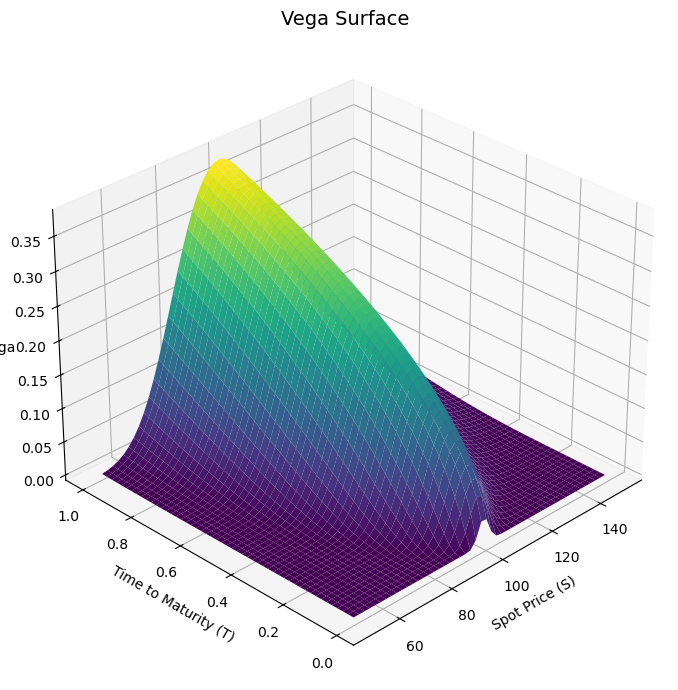

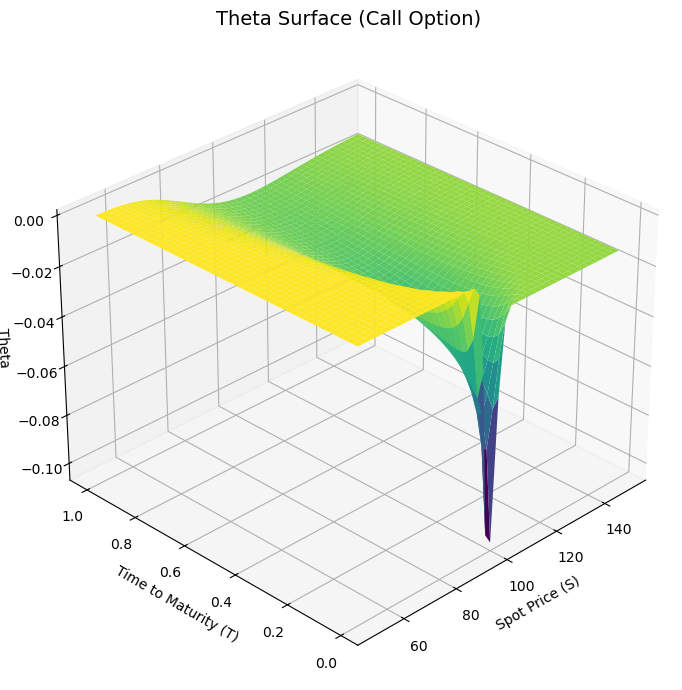

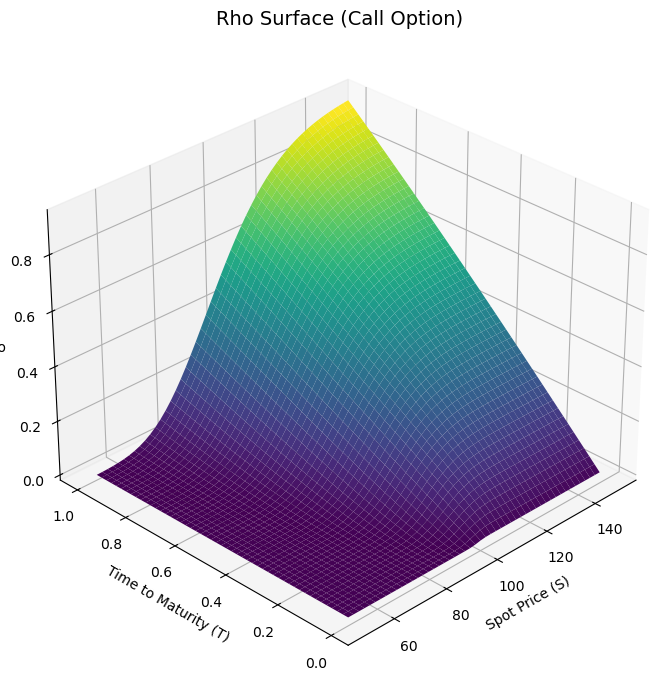

In [15]:
plot_greek_surface(S_grid, T_grid, Delta_grid, 'Delta Surface (Call Option)', 'Delta')
plot_greek_surface(S_grid, T_grid, Gamma_grid, 'Gamma Surface', 'Gamma')
plot_greek_surface(S_grid, T_grid, Vega_grid,  'Vega Surface',  'Vega')
plot_greek_surface(S_grid, T_grid, Theta_grid, 'Theta Surface (Call Option)', 'Theta')
plot_greek_surface(S_grid, T_grid, Rho_grid,   'Rho Surface (Call Option)', 'Rho')

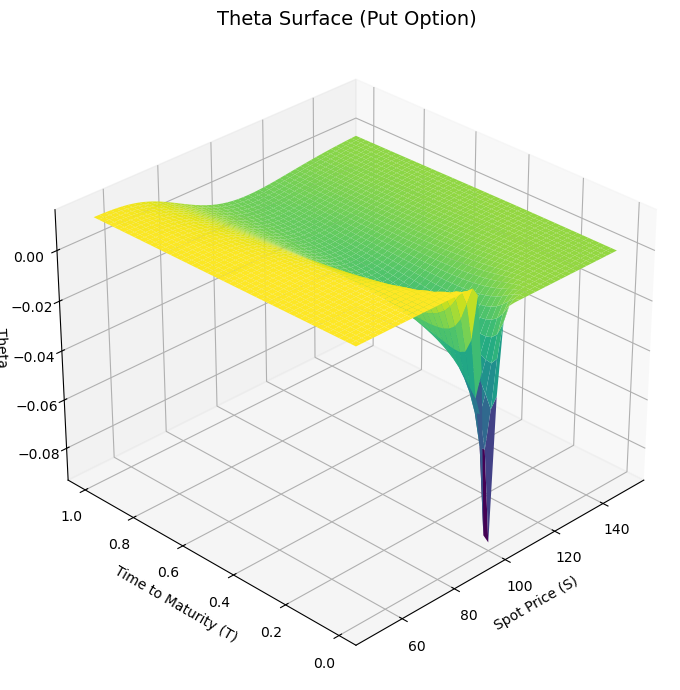

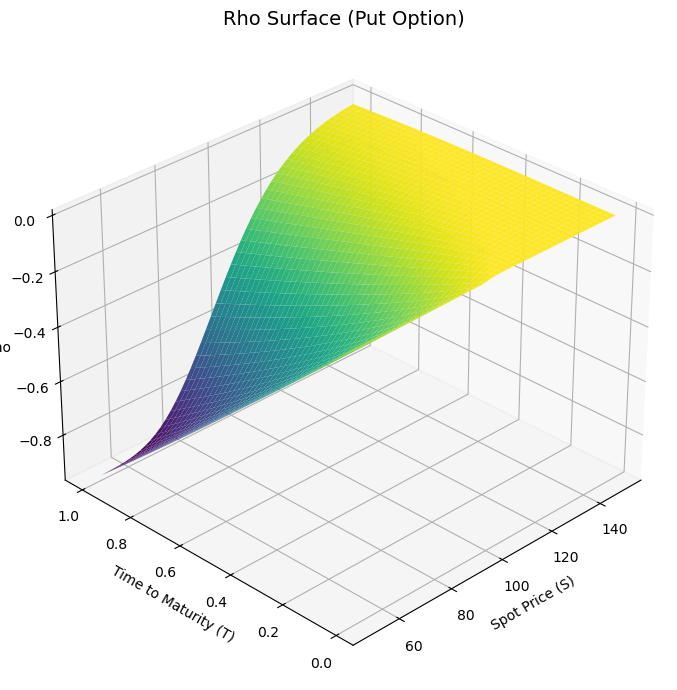

In [14]:
# Recompute only Theta and Rho for put options
Theta_put_grid = np.zeros_like(S_grid)
Rho_put_grid = np.zeros_like(S_grid)

for i in range(S_grid.shape[0]):
    for j in range(S_grid.shape[1]):
        S_val = S_grid[i, j]
        T_val = T_grid[i, j]
        Theta_put_grid[i, j] = theta(S_val, K, T_val, r, sigma, option_type='put')
        Rho_put_grid[i, j]   = rho(S_val, K, T_val, r, sigma, option_type='put')

# Plotting
plot_greek_surface(S_grid, T_grid, Theta_put_grid, 'Theta Surface (Put Option)', 'Theta')
plot_greek_surface(S_grid, T_grid, Rho_put_grid, 'Rho Surface (Put Option)', 'Rho')
